# How to use `RandomTree.jl`

## Load the packages

In [1]:
using RandomTree

In [2]:
using BenchmarkTools # For testing the speed

In [3]:
using Statistics

In [4]:
using Plots

In [5]:
using StatsBase

## Genrate random trees

We generate a Catalan trees of size 5. 

In [11]:
tree = CatalanTree(5)
degseq = degrees(tree)
println(degseq)

[2, 2, 0, 0, 0]


This tree is represented by its degree sequnce in depth-first-search order. It's corresponding to the following tree

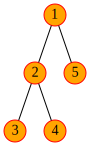

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = show(::IOContext{Base.GenericIOBuffer{Array{UInt8,1}}}, ::MIME{Symbol("image/svg+xml")}, ::PyCall.PyObject) at PyCall.jl:895
└ @ PyCall /home/xing/.julia/packages/PyCall/ttONZ/src/PyCall.jl:895


In [13]:
drawtree(degseq, true)

The algorithm for generting the degree sequneces is very fast. For example, for trees of size $10^6$, it take about 30ms

In [27]:
tree = CatalanTree(10^6)
@btime degrees(tree);

  15.877 ms (9 allocations: 15.26 MiB)


For Cayley tree and Binary tree (0 or 2 children), it's even faster

In [28]:
tree = CayleyTree(10^6)
@btime degrees(tree);

  23.041 ms (5 allocations: 7.65 MiB)


In [29]:
tree = BinaryTree(10^6)
@btime degrees(tree);

  22.591 ms (4 allocations: 7.63 MiB)


We can also generate fixed full-d-ary trees

In [15]:
tree = FullDAryTree(4, 2)

Full 2-arry tree (height 4) of size 31

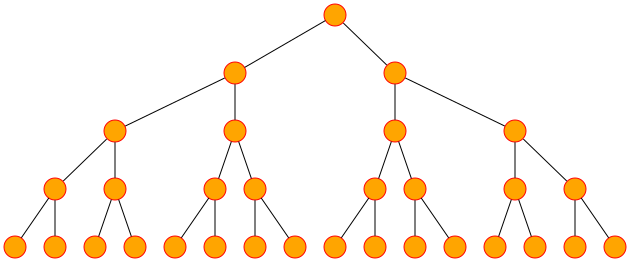

In [17]:
drawtree(tree)

## Simulations on trees

Several types of simulation on random trees are provided. For example, it is know that the number of leaves in a Cayley tree of size $n$ has expectation $n e^{-1}$ and has a normal limit distribution. Let's see if it's true by generate 2000 samples.

In [72]:
tree = CayleyTree(10^6)
sim = LeafSimulator(tree)

leaf number simulation of Cayley Tree of size 1000000

In [74]:
samples = simulation(sim, 2000);

The mean is about

In [75]:
mu = mean(samples)

367873.8795

Comparing with theoretical expectaion.

In [76]:
mu/(10^6*exp(-1))

0.9999848818095824

If we shift the samples by its mean and rescale by square root of the variance and draw a histogram, it does look a bit like a normal distribution.

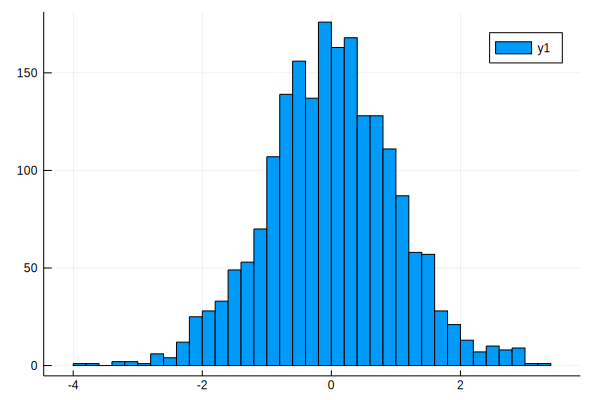

In [77]:
sigma = std(samples)
samples_rescaled = @. (samples-mu)/sigma;
histogram(samples_rescaled)

The moments also suggest a normal distribution.

In [78]:
print([round(moment(samples_rescaled, r), digits=3) for r in 1:7])

[-0.0, 1.0, -0.001, 3.32, -0.171, 18.977, -5.082]

## Drawing trees

To draw trees, you must have the graph drawing software [Graphviz](http://www.graphviz.org/) and this [Python package](https://github.com/xflr6/graphviz) installed.

If you want draw a tree from a degree sequence

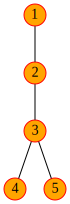

In [80]:
drawtree([1, 1, 2, 0, 0], true)

If you want to draw some random trees

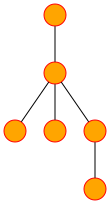

In [84]:
tree = CayleyTree(6)
drawtree(tree)

Conditional Galton-Watson trees are considered tall and skinny. Let's see it with our eyes.

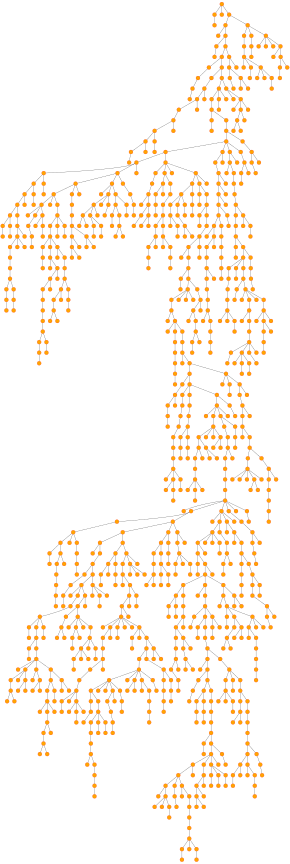

In [85]:
tree = CayleyTree(1000)
drawtree(tree)

But random recursive trees are much shorter

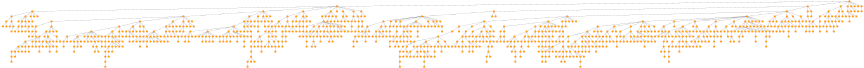

In [131]:
tree = RandomdRecursiveTree(1000)
drawtree(tree)